# Classification Problem
Aim : To classify if an client will subscribe for a term deposit with a Portuguese Bank

Dataset : Data Set from UCI ML Repository. The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

Relevant Papers : S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bank = pd.read_csv('Bank.txt', sep = ';', na_values="unknown")
bank.columns
bank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [2]:
bank = bank.drop(['pdays'], axis=1)
bank.shape

(4119, 20)

In [3]:
pd.isna(bank).sum()

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            0
campaign            0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64

In [4]:
#Filling the NA values in categorical columns with the mode values in those columns
bank = bank.fillna(bank.mode().iloc[0])

In [5]:
pd.isna(bank).sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 20 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(4), object(11)
memory usage: 643.7+ KB


In [7]:
# Correlation matrix of numerical columns
corr = bank.corr()
corr.style.background_gradient(cmap="viridis")

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1,0.0412986,-0.0141691,0.050931,-0.0191918,-0.000481996,0.0981352,-0.0150329,-0.0419362
duration,0.0412986,1,-0.085348,0.0257242,-0.0288483,0.0166723,-0.0347447,-0.032329,-0.0442176
campaign,-0.0141691,-0.085348,1,-0.0914899,0.176079,0.145021,0.0078824,0.159435,0.161037
previous,0.050931,0.0257242,-0.0914899,1,-0.415238,-0.164922,-0.0514203,-0.458851,-0.514853
emp.var.rate,-0.0191918,-0.0288483,0.176079,-0.415238,1,0.755155,0.195022,0.970308,0.897173
cons.price.idx,-0.000481996,0.0166723,0.145021,-0.164922,0.755155,1,0.045835,0.657159,0.47256
cons.conf.idx,0.0981352,-0.0347447,0.0078824,-0.0514203,0.195022,0.045835,1,0.276595,0.107054
euribor3m,-0.0150329,-0.032329,0.159435,-0.458851,0.970308,0.657159,0.276595,1,0.942589
nr.employed,-0.0419362,-0.0442176,0.161037,-0.514853,0.897173,0.47256,0.107054,0.942589,1


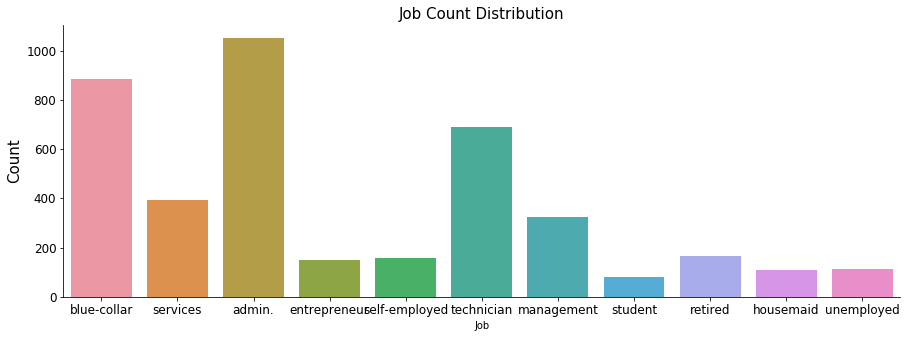

In [8]:
## Plot of jobwise distribution in the data

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'job', data = bank)
ax.set_xlabel('Job', fontsize=10)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=12)
sns.despine()

Text(0, 0.5, 'Subscription Frequency')

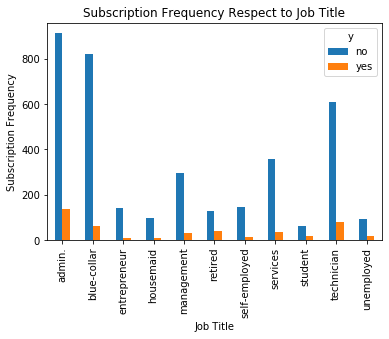

In [9]:
%matplotlib inline
pd.crosstab(bank.job, bank.y).plot(kind='bar')
plt.title('Subscription Frequency Respect to Job Title')
plt.xlabel('Job Title')
plt.ylabel('Subscription Frequency')
#plt.savefig('subscription_for_jobs')

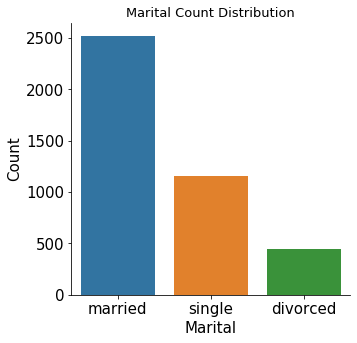

In [10]:
## Marital

fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sns.countplot(x = 'marital', data = bank)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Count Distribution', fontsize=13)
ax.tick_params(labelsize=15)
sns.despine()

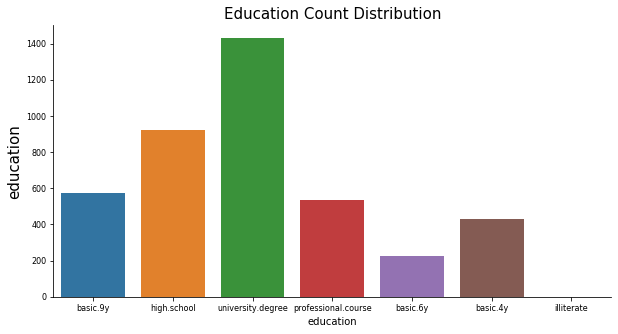

In [11]:
## Education variable

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'education', data = bank)
#ax.set_xlabel('education', fontsize=5)
ax.set_ylabel('education', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=8)
sns.despine()

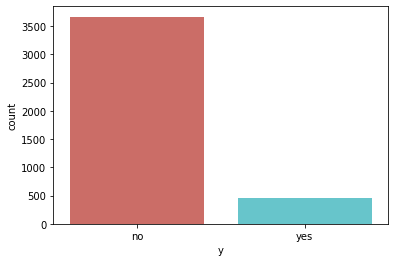

<Figure size 432x288 with 0 Axes>

In [12]:
#Target Variable y = term deposit
bank['y'].value_counts()

# Target Variable y = term deposit
import seaborn as sns
import matplotlib.pyplot as plt
bank['y'].value_counts()
sns.countplot(x='y', data=bank, palette='hls')
plt.show()
plt.savefig('count plot')


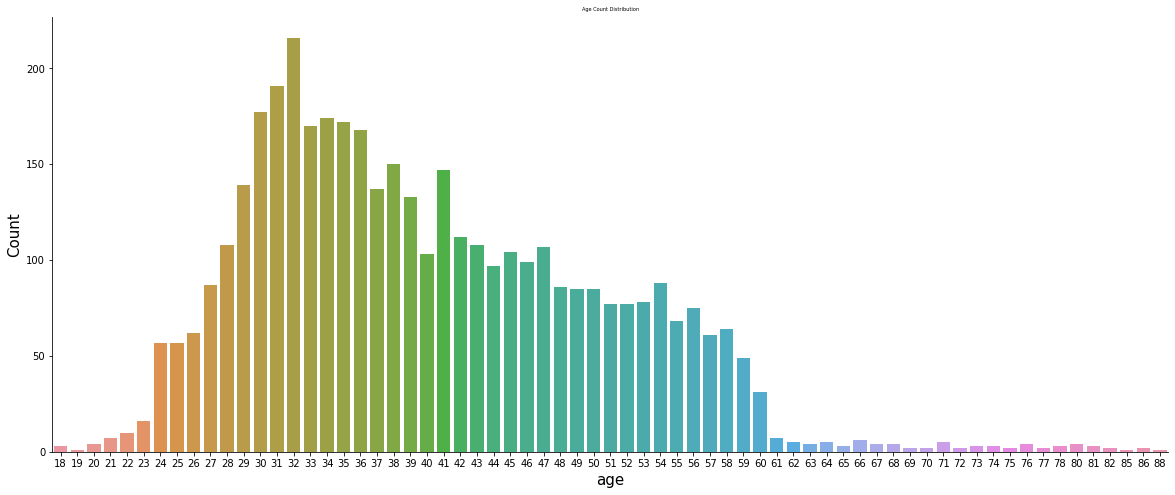

In [13]:
## Age

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank)
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=5)
ax.tick_params(labelsize=10)
sns.despine()

In [14]:
# Finding quantiles of age column to group age
bank['age'].describe()

count    4119.000000
mean       40.113620
std        10.313362
min        18.000000
25%        32.000000
50%        38.000000
75%        47.000000
max        88.000000
Name: age, dtype: float64

In [15]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 38), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 38) & (dataframe['age'] <= 47), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 88), 'age'] = 4
           
    return dataframe

age(bank);


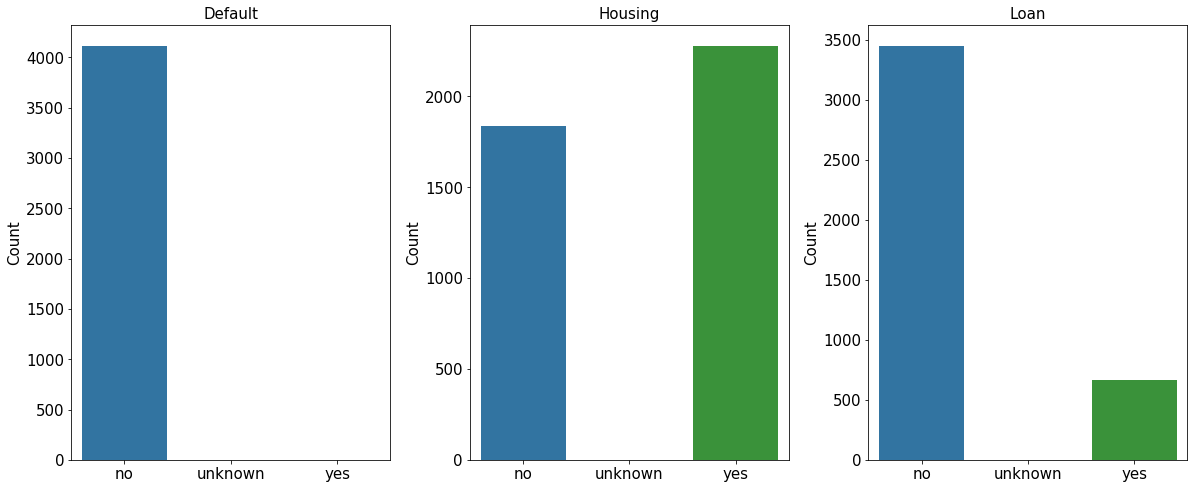

In [16]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = bank, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = bank, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

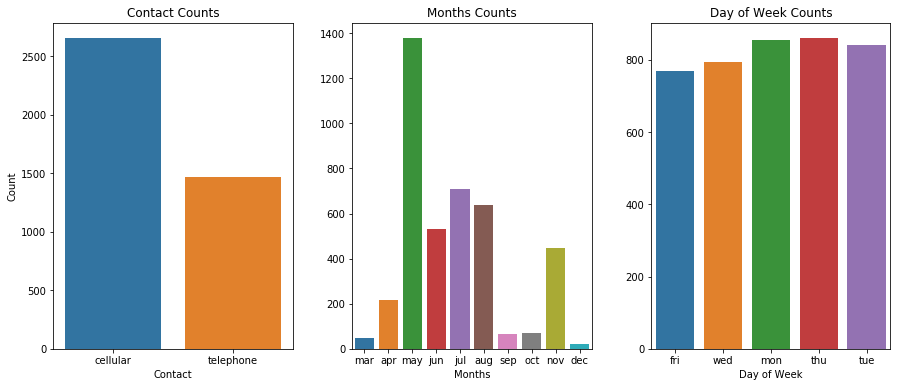

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(bank['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(bank['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(bank['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)


In [18]:
# We group the 'duration' column which is a duration of minutes 
bank['duration'].describe()

count    4119.000000
mean      256.788055
std       254.703736
min         0.000000
25%       103.000000
50%       181.000000
75%       317.000000
max      3643.000000
Name: duration, dtype: float64

In [19]:
def duration(data):

    data.loc[data['duration'] <= 103, 'duration'] = 1
    data.loc[(data['duration'] > 103) & (data['duration'] <= 181)  , 'duration']    = 2
    data.loc[(data['duration'] > 181) & (data['duration'] <= 317)  , 'duration']   = 3
    data.loc[(data['duration'] > 317) & (data['duration'] <= 3643), 'duration'] = 4

    return data
duration(bank);

# Encoding <font color = black>

In [20]:
# Mapping education orderly 

df5 = {"education": {"illiterate": 0, "basic.4y": 1, "basic.6y": 2, "basic.9y": 3, 
                      "high.school": 4, "university.degree":5, "professional.course":6, "unknown":7}}
bank.replace(df5, inplace=True)

In [21]:
##One hot encoder
bank = pd.get_dummies(data = bank, columns = ['job'] , prefix = ['job'] , drop_first = True)
bank = pd.get_dummies(data = bank, columns = ['marital'] , prefix = ['marital'] , drop_first = True)
bank = pd.get_dummies(data = bank, columns = ['default'] , prefix = ['default'] , drop_first = True)
bank = pd.get_dummies(data = bank, columns = ['housing'] , prefix = ['housing'] , drop_first = True)
bank = pd.get_dummies(data = bank, columns = ['loan'] , prefix = ['loan'] , drop_first = True)


In [22]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank['contact']     = labelencoder_X.fit_transform(bank['contact']) 
bank['month']       = labelencoder_X.fit_transform(bank['month']) 
bank['day_of_week'] = labelencoder_X.fit_transform(bank['day_of_week']) 
bank['poutcome']     = labelencoder_X.fit_transform(bank['poutcome']) 
bank['education'] = labelencoder_X.fit_transform(bank['education'])

In [23]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 30 columns):
age                  4119 non-null int64
education            4119 non-null int32
contact              4119 non-null int32
month                4119 non-null int32
day_of_week          4119 non-null int32
duration             4119 non-null int64
campaign             4119 non-null int64
previous             4119 non-null int64
poutcome             4119 non-null int32
emp.var.rate         4119 non-null float64
cons.price.idx       4119 non-null float64
cons.conf.idx        4119 non-null float64
euribor3m            4119 non-null float64
nr.employed          4119 non-null float64
y                    4119 non-null object
job_blue-collar      4119 non-null uint8
job_entrepreneur     4119 non-null uint8
job_housemaid        4119 non-null uint8
job_management       4119 non-null uint8
job_retired          4119 non-null uint8
job_self-employed    4119 non-null uint8
job_services         

In [24]:
bank.head()

,age,education,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes
0,1,3,0,6,0,4,2,0,1,-1.8,...,0,0,0,0,0,1,0,0,1,0
1,3,4,1,6,0,4,4,0,1,1.1,...,0,1,0,0,0,0,1,0,0,0
2,1,4,1,4,4,3,1,0,1,1.4,...,0,1,0,0,0,1,0,0,1,0
3,2,3,1,4,0,1,3,0,1,1.4,...,0,1,0,0,0,1,0,0,1,0
4,3,5,0,7,1,1,1,0,1,-0.1,...,0,0,0,0,0,1,0,0,1,0


# Splitting Data <font color = black>

In [25]:
#Converting dependent variable from categorical to dummy
X = bank.drop(['y'],axis=1) 
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(0)

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# Logistic Regression <font color = black>

In [27]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
lreg.fit(X_train, y_train)
#lpred.fit = lreg.predict(X_train)

print('Train score: %.4f'%lreg.score(X_train, y_train))
print('Test score: %.4f'%lreg.score(X_test, y_test))


Train score: 0.9097
Test score: 0.9029


c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# KNN Classifier <font color = black>

In [28]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

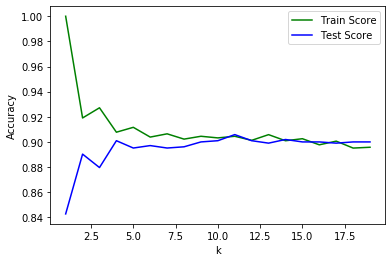

In [29]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

# Linear SVC <font color = black>

In [30]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X_train, y_train)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)


print("Accuracy on training set: {:.3f}".format(linear_svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(linear_svm.score(X_test, y_test)))


Coefficient shape:  (1, 29)
Intercept shape:  (1,)
Accuracy on training set: 0.910
Accuracy on test set: 0.900


c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Kernel SVC <font color = black>

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

svc=SVC(kernel='rbf', gamma=0.01, C=1)
svm = svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test, y_test)))



c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on training set: 0.887
Accuracy on test set: 0.902


# Decision Tree <font color = black>

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.866


## GridSearch CV for best parameter <font color = black>

# Logistic Regression <font color = black>

In [33]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

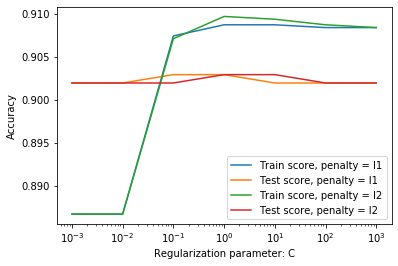

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 1000],
              'penalty':['l1','l2']}

print("Parameter grid:\n{}".format(param_grid))


Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 1000], 'penalty': ['l1', 'l2']}


In [36]:
grid_search = GridSearchCV(LogisticRegression(), 
                           param_grid, cv=5, return_train_score=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

grid_search.fit(X_train, y_train)

c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. S

c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\

c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\us

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [37]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'C': 10, 'penalty': 'l2'}
Best cross-validation score: 0.91


# KNN Classifier <font color = black>

In [38]:
from sklearn.metrics import accuracy_score

param_grid = {'n_neighbors': range(1,20)}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

grid_search.fit(X_train, y_train)

Parameter grid:
{'n_neighbors': range(1, 20)}


c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\anush\appdata\local\programs\py

c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\anush\appdata\local\programs\py

c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\anush\appdata\local\programs\py

c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\anush\appdata\local\programs\py

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': range(1, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [39]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
pred=grid_search.predict(X_test)
print("Best cross-validation score in test case: {:.2f}".format(accuracy_score(y_test,pred)))

Best parameters: {'n_neighbors': 8}
Best cross-validation score: 0.90
Best cross-validation score in test case: 0.90


In [40]:
knn = KNeighborsClassifier(17)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Train score: {:.4f}'.format(knn.score(X_test, y_test)))


c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Train score: 0.9058
Train score: 0.9039


# Kernel SVC <font color = black>

In [41]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,100, 1000],
              'kernel':['rbf'],
             'gamma' :[0.01,0.1,1,10,100]}
print("Parameter grid:\n{}".format(param_grid))


Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.01, 0.1, 1, 10, 100]}


In [42]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
grid_search.fit(X_train, y_train)

c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversio

c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversio

c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversio

c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversio

c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversio

c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversio

c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anush\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversio

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [43]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
pred=grid_search.predict(X_test)
print("Best cross-validation score in test case: {:.2f}".format(accuracy_score(y_test,pred)))


Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.91
Best cross-validation score in test case: 0.90


# Decision Tree <font color = black>

In [44]:
dtree = DecisionTreeClassifier(max_depth=2, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))


Accuracy on training set: 0.905
Accuracy on test set: 0.900
